# *Аналитическое исследование прогнозирования качества вина на основе физико-химических показателей*

## **Постановка задачи**
Представленное исследование направлено на решение проблемы объективной оценки и прогнозирования качества вина с использованием методов машинного обучения. Традиционные методы оценки характеризуются высокой субъективностью, временными затратами и зависимостью от экспертного мнения.

## **Актуальность исследования**
Винодельческая индустрия сталкивается с рядом системных проблем:

*   Высокая изменчивость качества между производственными партиями
*   Длительный цикл обратной связи (от 6 до 24 месяцев для оценки выдержанного вина)
*   Экономические потери от бракованной продукции (5-15% от общего объема)
*   Отсутствие стандартизированных метрик для прогнозной оценки на ранних этапах производства



## **Цели исследования**
Идентификация ключевых физико-химических параметров, значимо влияющих на итоговое качество вина

Разработка прогностической модели для оценки качества по 10-балльной шкале

Создание инструмента для раннего выявления потенциально проблемных производственных партий



In [ ]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub


path = kagglehub.dataset_download("rajyellow46/wine-quality")
print("Скачано в:", path)
print(os.listdir(path))


df = pd.read_csv(path + "/winequalityN.csv")
df.head()

100%|██████████| 98.0k/98.0k [00:00<00:00, 13.0MB/s]

Extracting files...
Скачано в: /root/.cache/kagglehub/datasets/rajyellow46/wine-quality/versions/1
['winequalityN.csv']


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mapping_dict = {'white': 0, 'red': 1}
df.columns
df['type_int'] = df['type'].map(mapping_dict)
df.drop(columns='type', inplace=True)
df.dropna(inplace=True)
X, y = df.drop(columns='quality'), df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Метрики на тестовой выборке
print("=== Метрики на тестовой выборке ===")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")

# Кросс-валидация
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"\n=== Кросс-валидация (5-fold) ===")
print(f"R² scores: {cv_scores}")
print(f"Mean R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

=== Метрики на тестовой выборке ===
R² Score: 0.3465
MSE: 0.5178
RMSE: 0.7196
MAE: 0.5718

=== Кросс-валидация (5-fold) ===
R² scores: [0.21278101 0.26220749 0.30696016 0.2340613  0.28587316]
Mean R²: 0.2604 (+/- 0.0680)


In [ ]:
df.shape

(6463, 13)

In [ ]:
df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.type_int.value_counts()

,count
type_int,
0,4870
1,1593


<Axes: xlabel='quality', ylabel='count'>

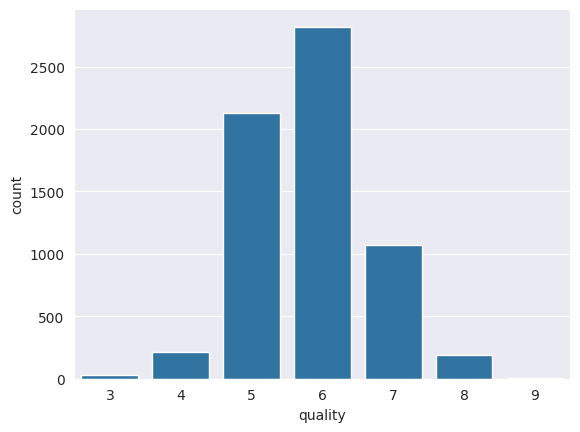

In [ ]:
sns.set_style("darkgrid")
sns.barplot(df.quality.value_counts())

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'type_int'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

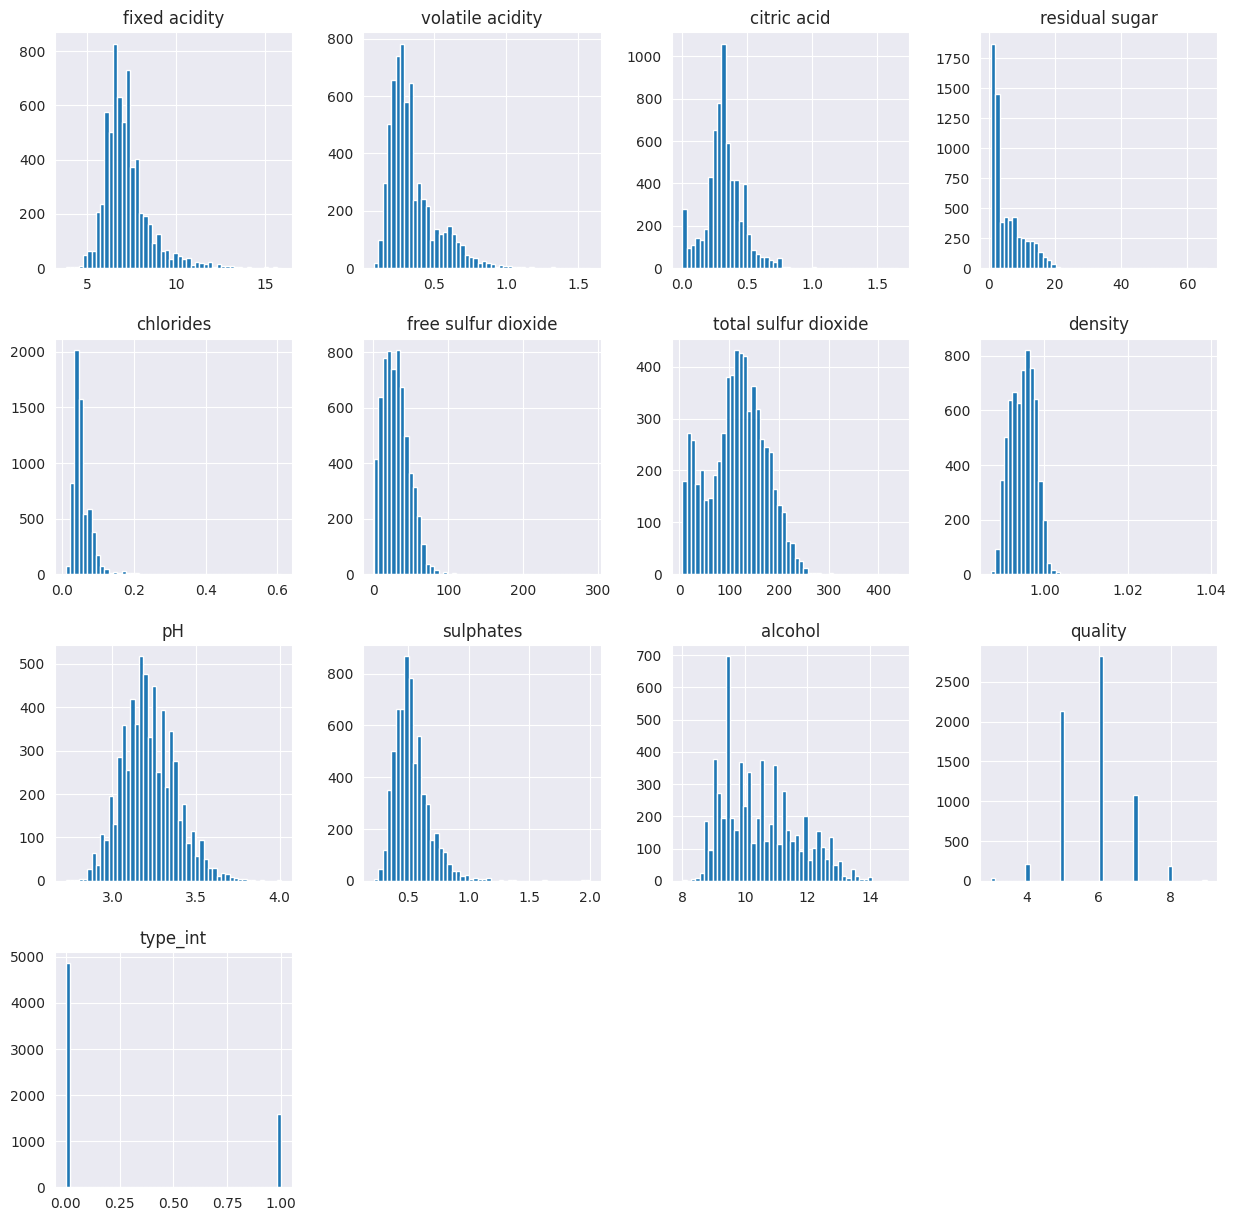

In [ ]:
df.hist(bins=50,figsize=(15,15))

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_int
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505,0.246480
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286,0.430995
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


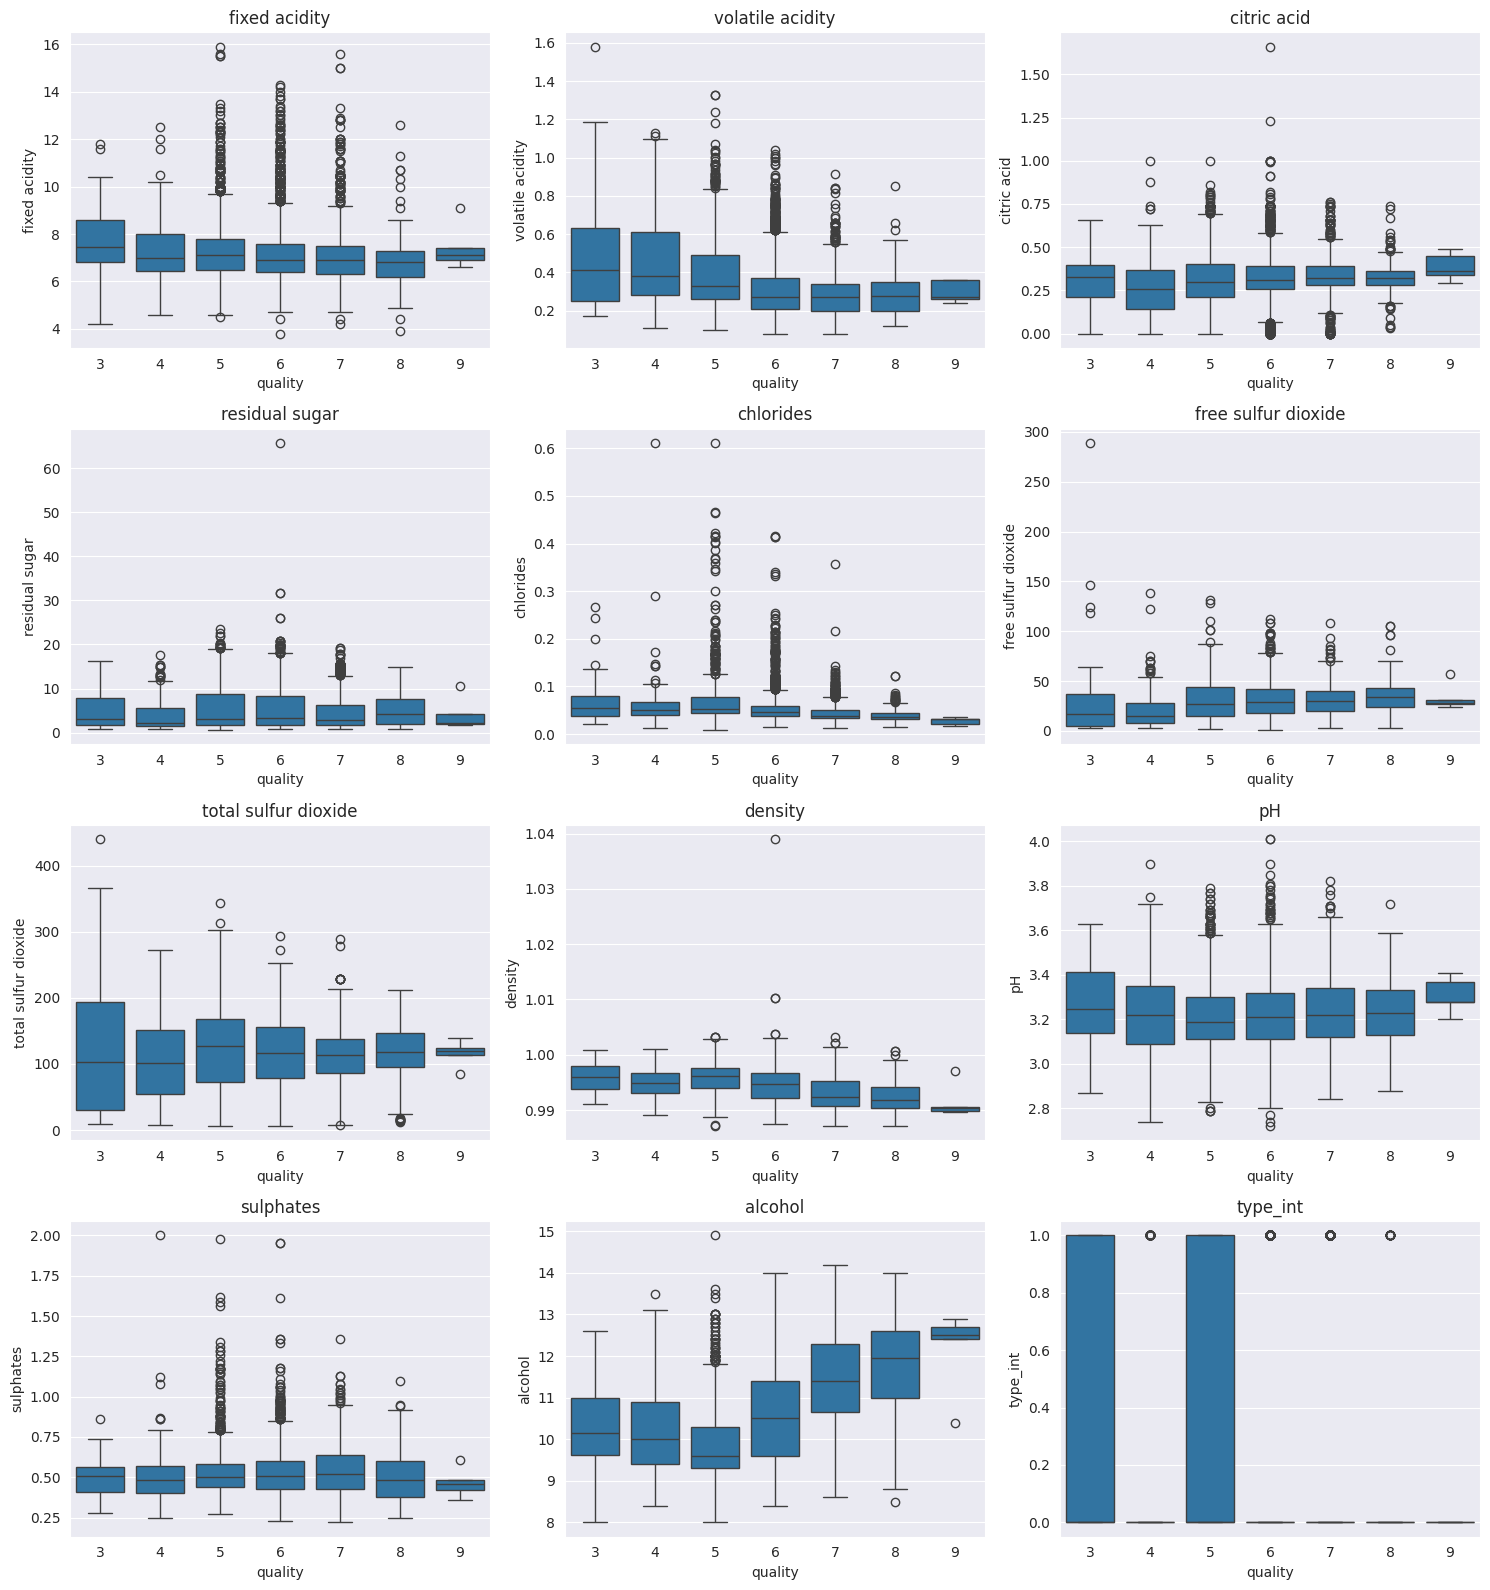

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def boxplot_grid(df, target, n_cols=4):
    """
    Строит boxplot для всех числовых колонок против target в виде сетки.
    n_cols — количество графиков в строке.
    """

    # выбираем числовые колонки, кроме target
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    numeric_cols = [c for c in numeric_cols if c != target]

    n = len(numeric_cols)                     # всего графиков
    n_rows = math.ceil(n / n_cols)            # сколько строк нужно

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten()                     # выравниваем массив осей

    for ax, col in zip(axes, numeric_cols):
        sns.boxplot(x=df[target], y=df[col], ax=ax)
        ax.set_title(col)

    # скрыть пустые ячейки, если графиков меньше чем ячеек сетки
    for ax in axes[n:]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()

boxplot_grid(df, target="quality", n_cols=3)

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

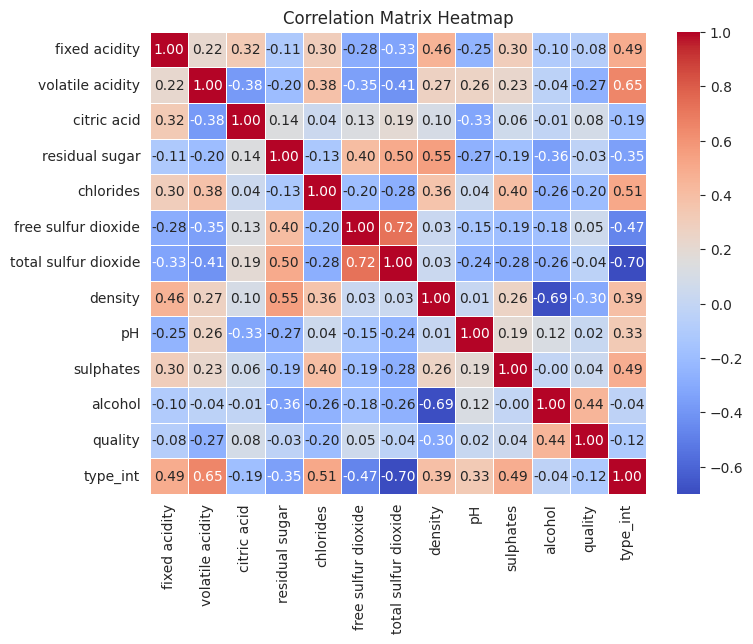

In [ ]:
new_df = df
correlation_matrix = new_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Выбираем сильно коррелированные признаки
# correlated_features = ['citric acid', 'volatile acidity']
correlated_features = ['alcohol', 'density']
correlated_features = ['total sulfur dioxide', 'type_int']



# Создаем полиномиальные признаки степени 2
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(new_df[correlated_features])
poly_feature_names = poly.get_feature_names_out(correlated_features)

# Добавляем к датафрейму
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=new_df.index)
super_new_df = pd.concat([new_df, poly_df], axis=1)



In [ ]:
all_features = pd.DataFrame({
    'pearson': super_new_df.corr()['quality'],
    'spearman': super_new_df.corr(method='spearman')['quality']
})
all_features

,pearson,spearman
fixed acidity,-0.076174,-0.097807
volatile acidity,-0.266677,-0.258301
citric acid,0.084926,0.105428
residual sugar,-0.034654,-0.013764
chlorides,-0.200553,-0.295631
free sulfur dioxide,0.054924,0.086665
total sulfur dioxide,-0.041598,-0.054730
density,-0.304447,-0.321344
pH,0.018403,0.031395
sulphates,0.039054,0.030382


In [ ]:
# выбираем наиболее значимые признаки
important_features = all_features[
    (all_features['pearson'].abs() > 0.1) |
    (all_features['spearman'].abs() > 0.1)
].index

df = super_new_df[important_features].drop(columns=['type_int^2'])\
  .rename(columns={'total sulfur dioxide type_int': 'sulfur_dioxide_and_type'})
df

,volatile acidity,citric acid,chlorides,density,alcohol,quality,type_int,type_int,type_int,type_int,sulfur_dioxide_and_type
0,0.270,0.36,0.045,1.00100,8.8,6,0,0.0,0,0.0,0.0
1,0.300,0.34,0.049,0.99400,9.5,6,0,0.0,0,0.0,0.0
2,0.280,0.40,0.050,0.99510,10.1,6,0,0.0,0,0.0,0.0
3,0.230,0.32,0.058,0.99560,9.9,6,0,0.0,0,0.0,0.0
4,0.230,0.32,0.058,0.99560,9.9,6,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6491,0.620,0.08,0.068,0.99651,9.5,6,1,1.0,1,1.0,38.0
6492,0.600,0.08,0.090,0.99490,10.5,5,1,1.0,1,1.0,44.0
6494,0.510,0.13,0.076,0.99574,11.0,6,1,1.0,1,1.0,40.0
6495,0.645,0.12,0.075,0.99547,10.2,5,1,1.0,1,1.0,44.0


In [ ]:
from sklearn.model_selection import train_test_split

X, y = df.drop(columns='quality'), df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Создаем и обучаем модель
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Метрики на тестовой выборке
print("=== Метрики на тестовой выборке ===")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")

# Кросс-валидация
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"\n=== Кросс-валидация (5-fold) ===")
print(f"R² scores: {cv_scores}")
print(f"Mean R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

=== Метрики на тестовой выборке ===
R² Score: 0.3226
MSE: 0.5367
RMSE: 0.7326
MAE: 0.5800

=== Кросс-валидация (5-fold) ===
R² scores: [0.20956058 0.22397413 0.27734157 0.24715952 0.27192207]
Mean R²: 0.2460 (+/- 0.0527)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.model_selection import KFold

# Настраиваемая кросс-валидация
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = []
mse_scores = []
fold = 1

print("=== Детальная кросс-валидация ===")
for train_idx, val_idx in kf.split(X):
    X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]

    # Обучаем и предсказываем
    model_cv = LinearRegression()
    model_cv.fit(X_train_cv, y_train_cv)
    y_pred_cv = model_cv.predict(X_val_cv)

    # Считаем метрики
    r2 = r2_score(y_val_cv, y_pred_cv)
    cv_scores.append(r2)

    mse = mean_squared_error(y_val_cv, y_pred_cv)
    mse_scores.append(mse)

    print(f"Fold {fold}: R² = {r2:.4f}")
    print(f"Fold {fold}: MSE = {mse:.4f}")
    fold += 1

print(f"\nИтог: Mean R² = {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores) * 2:.4f})")
print(f"\nИтог: Mean MSE = {np.mean(mse_scores):.4f} (+/- {np.std(mse_scores) * 2:.4f})")


=== Детальная кросс-валидация ===
Fold 1: R² = 0.3226
Fold 1: MSE = 0.5367
Fold 2: R² = 0.2517
Fold 2: MSE = 0.5439
Fold 3: R² = 0.2732
Fold 3: MSE = 0.5508
Fold 4: R² = 0.2604
Fold 4: MSE = 0.5842
Fold 5: R² = 0.2393
Fold 5: MSE = 0.5654

Итог: Mean R² = 0.2694 (+/- 0.0576)

Итог: Mean MSE = 0.5562 (+/- 0.0338)


In [ ]:
1

1

In [ ]:
class CustomLinearRegression:
    """
    Кастомная реализация линейной регрессии с:
    1. Градиентным спуском
    2. L1/L2 регуляризацией
    3. Разными оптимизаторами
    4. Ранней остановкой
    """

    def __init__(self, learning_rate=0.01, n_iterations=1000,
                 regularization='l2', alpha=0.01, optimizer='gradient_descent',
                 early_stopping=True, patience=10, verbose=False):
        """
        Инициализация модели

        Parameters:
        -----------
        learning_rate : float, скорость обучения
        n_iterations : int, количество итераций обучения
        regularization : str, тип регуляризации ('l1', 'l2', 'elasticnet', None)
        alpha : float, коэффициент регуляризации
        optimizer : str, оптимизатор ('gradient_descent', 'mini_batch', 'stochastic')
        early_stopping : bool, использовать ли раннюю остановку
        patience : int, терпение для ранней остановки
        verbose : bool, вывод процесса обучения
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.regularization = regularization
        self.alpha = alpha
        self.optimizer = optimizer
        self.early_stopping = early_stopping
        self.patience = patience
        self.verbose = verbose

        self.weights = None
        self.bias = None
        self.loss_history = []
        self.val_loss_history = []

    def _initialize_parameters(self, n_features):
        """Инициализация весов и смещения"""
        # Инициализация Ксавьера для лучшей сходимости
        limit = np.sqrt(6 / (n_features + 1))
        self.weights = np.random.uniform(-limit, limit, size=n_features)
        self.bias = 0.0

    def _add_intercept(self, X):
        """Добавление столбца единиц для смещения"""
        return np.c_[np.ones((X.shape[0], 1)), X]

    def _compute_loss(self, y_true, y_pred, sample_size=None):
        """Вычисление функции потерь с регуляризацией"""
        mse = np.mean((y_true - y_pred) ** 2)

        if self.regularization == 'l1':
            reg_term = self.alpha * np.sum(np.abs(self.weights))
        elif self.regularization == 'l2':
            reg_term = self.alpha * np.sum(self.weights ** 2)
        elif self.regularization == 'elasticnet':
            l1_term = self.alpha * np.sum(np.abs(self.weights))
            l2_term = self.alpha * np.sum(self.weights ** 2)
            reg_term = 0.5 * l2_term + 0.5 * l1_term
        else:
            reg_term = 0

        # Нормализация по размеру выборки
        if sample_size is not None:
            reg_term = reg_term / sample_size

        return mse + reg_term

    def _compute_gradients(self, X, y, y_pred):
        """Вычисление градиентов"""
        m = X.shape[0]
        error = y_pred - y

        # Градиенты для MSE
        dw = (2/m) * X.T @ error
        db = (2/m) * np.sum(error)

        # Добавляем регуляризацию
        if self.regularization == 'l1':
            dw += self.alpha * np.sign(self.weights)
        elif self.regularization == 'l2':
            dw += 2 * self.alpha * self.weights
        elif self.regularization == 'elasticnet':
            dw += self.alpha * (0.5 * 2 * self.weights + 0.5 * np.sign(self.weights))

        return dw, db

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Обучение модели

        Parameters:
        -----------
        X : array-like, тренировочные признаки
        y : array-like, целевая переменная
        X_val : array-like, валидационные признаки (опционально)
        y_val : array-like, валидационная целевая переменная (опционально)
        """
        X = np.array(X)
        y = np.array(y).flatten()

        # Инициализация параметров
        self._initialize_parameters(X.shape[1])

        # Для ранней остановки
        best_loss = float('inf')
        patience_counter = 0
        best_weights = self.weights.copy()
        best_bias = self.bias

        self.X_mean = np.mean(X, axis=0)
        self.X_std = np.std(X, axis=0) + 1e-8
        X_normalized = (X - self.X_mean) / self.X_std

        # История потерь
        self.loss_history = []
        self.val_loss_history = []

        for i in range(self.n_iterations):
            if self.optimizer == 'stochastic':
                idx = np.random.randint(0, X_normalized.shape[0])
                X_batch = X_normalized[idx:idx+1]
                y_batch = y[idx:idx+1]
            elif self.optimizer == 'mini_batch':
                batch_size = 32
                idx = np.random.choice(X_normalized.shape[0], batch_size, replace=False)
                X_batch = X_normalized[idx]
                y_batch = y[idx]
            else:
                X_batch = X_normalized
                y_batch = y

            y_pred_batch = X_batch @ self.weights + self.bias

            dw, db = self._compute_gradients(X_batch, y_batch, y_pred_batch)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if i % 10 == 0:
                y_pred_full = X_normalized @ self.weights + self.bias
                train_loss = self._compute_loss(y, y_pred_full, X.shape[0])
                self.loss_history.append(train_loss)

                if X_val is not None and y_val is not None:
                    X_val_norm = (np.array(X_val) - self.X_mean) / self.X_std
                    y_val_pred = X_val_norm @ self.weights + self.bias
                    val_loss = self._compute_loss(y_val, y_val_pred, X_val.shape[0])
                    self.val_loss_history.append(val_loss)

                    if self.early_stopping:
                        if val_loss < best_loss - 1e-4:
                            best_loss = val_loss
                            patience_counter = 0
                            best_weights = self.weights.copy()
                            best_bias = self.bias
                        else:
                            patience_counter += 1

                        if patience_counter >= self.patience:
                            if self.verbose:
                                print(f"Ранняя остановка на итерации {i}")
                            self.weights = best_weights
                            self.bias = best_bias
                            break

                if self.verbose and i % 100 == 0:
                    print(f"Iteration {i}: Train Loss = {train_loss:.4f}")

        self.weights = self.weights / self.X_std
        self.bias = self.bias - np.dot(self.weights, self.X_mean)

        return self

    def predict(self, X):
        """Предсказание"""
        X = np.array(X)
        return X @ self.weights + self.bias

    def score(self, X, y):
        """R² score"""
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / (ss_tot + 1e-8))

    def get_coefficients(self):
        """Получение коэффициентов модели"""
        return self.weights, self.bias

    def plot_loss_history(self):
        """Визуализация истории потерь"""
        plt.figure(figsize=(10, 6))
        plt.plot(self.loss_history, label='Train Loss')
        if self.val_loss_history:
            plt.plot(self.val_loss_history, label='Validation Loss')
        plt.xlabel('Iteration (x10)')
        plt.ylabel('Loss')
        plt.title('Loss History')
        plt.legend()
        plt.grid(True)
        plt.show()



ТЕСТИРОВАНИЕ КАСТОМНОЙ ЛИНЕЙНОЙ РЕГРЕССИИ
Train size: (3877, 10)
Validation size: (1293, 10)
Test size: (1293, 10)

Конфигурация: Базовый градиентный спуск
Train R²: 0.2651, RMSE: 0.7427
Val R²: 0.2371, RMSE: 0.7653
Test R²: 0.3215, RMSE: 0.7332
Количество признаков: 10
Смещение (bias): -35.1146
Средний вес: 4.5107

Конфигурация: L2 регуляризация
Train R²: 0.2596, RMSE: 0.7455
Val R²: 0.2345, RMSE: 0.7666
Test R²: 0.3127, RMSE: 0.7380
Количество признаков: 10
Смещение (bias): -10.3885
Средний вес: 1.7265

Конфигурация: L1 регуляризация
Train R²: 0.2624, RMSE: 0.7441
Val R²: 0.2376, RMSE: 0.7650
Test R²: 0.3185, RMSE: 0.7348
Количество признаков: 10
Смещение (bias): -11.4856
Средний вес: 2.0043

Конфигурация: Mini-batch оптимизация
Train R²: 0.2551, RMSE: 0.7477
Val R²: 0.2371, RMSE: 0.7653
Test R²: 0.3116, RMSE: 0.7386
Количество признаков: 10
Смещение (bias): 3.2647
Средний вес: 0.4790


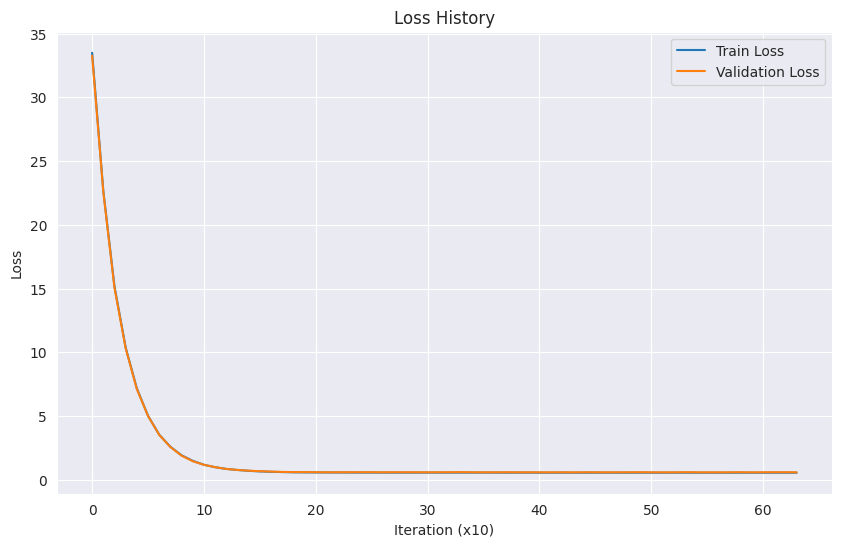


СРАВНЕНИЕ СО SKLEARN LinearRegression
Sklearn Results:
R² Score: 0.3226
MSE: 0.5367
RMSE: 0.7326

Custom Model Results:
R² Score: 0.3146
MSE: 0.5431
RMSE: 0.7370


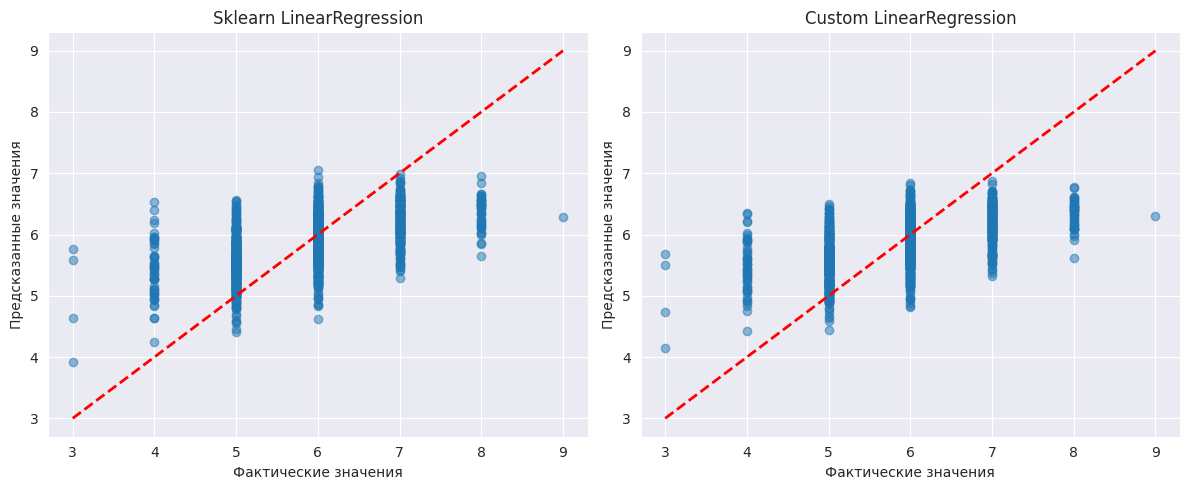


ВАЖНОСТЬ ПРИЗНАКОВ (по абсолютным весам)
                   feature     weight  abs_weight
3                  density  10.510186   10.510186
0         volatile acidity  -1.479517    1.479517
2                chlorides  -1.052462    1.052462
4                  alcohol   0.293570    0.293570
6                 type_int   0.111513    0.111513
8                 type_int   0.093946    0.093946
5                 type_int  -0.054607    0.054607
7                 type_int   0.022199    0.022199
9  sulfur_dioxide_and_type  -0.001755    0.001755
1              citric acid  -0.001742    0.001742


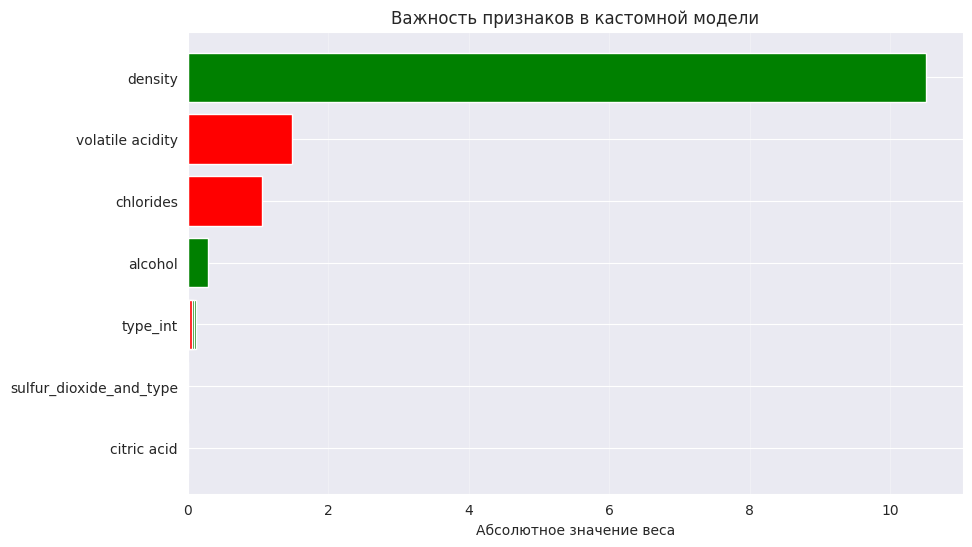


КРОСС-ВАЛИДАЦИЯ ДЛЯ КАСТОМНОЙ МОДЕЛИ
Fold 1: R² = 0.3128
Fold 2: R² = 0.2505
Fold 3: R² = 0.2660
Fold 4: R² = 0.2549
Fold 5: R² = 0.2335

Средний R²: 0.2635 (+/- 0.0535)


In [ ]:


print("\n" + "="*60)
print("ТЕСТИРОВАНИЕ КАСТОМНОЙ ЛИНЕЙНОЙ РЕГРЕССИИ")
print("="*60)

# Разделение на train/val/test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

print(f"Train size: {X_train.shape}")
print(f"Validation size: {X_val.shape}")
print(f"Test size: {X_test.shape}")

# Тестирование разных конфигураций
configs = [
    {'name': 'Базовый градиентный спуск', 'regularization': None, 'alpha': 0},
    {'name': 'L2 регуляризация', 'regularization': 'l2', 'alpha': 0.1},
    {'name': 'L1 регуляризация', 'regularization': 'l1', 'alpha': 0.01},
    {'name': 'Mini-batch оптимизация', 'regularization': 'l2', 'alpha': 0.1, 'optimizer': 'mini_batch'},
]

for config in configs:
    print(f"\n{'='*40}")
    print(f"Конфигурация: {config['name']}")
    print('='*40)

    model_custom = CustomLinearRegression(
        learning_rate=0.01,
        n_iterations=1000,
        regularization=config.get('regularization', 'l2'),
        alpha=config.get('alpha', 0.1),
        optimizer=config.get('optimizer', 'gradient_descent'),
        early_stopping=True,
        patience=20,
        verbose=False
    )

    # Обучение
    model_custom.fit(X_train, y_train, X_val, y_val)

    # Предсказания
    y_train_pred = model_custom.predict(X_train)
    y_val_pred = model_custom.predict(X_val)
    y_test_pred = model_custom.predict(X_test)

    # Метрики
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f"Train R²: {train_r2:.4f}, RMSE: {train_rmse:.4f}")
    print(f"Val R²: {val_r2:.4f}, RMSE: {val_rmse:.4f}")
    print(f"Test R²: {test_r2:.4f}, RMSE: {test_rmse:.4f}")

    # Коэффициенты
    weights, bias = model_custom.get_coefficients()
    print(f"Количество признаков: {len(weights)}")
    print(f"Смещение (bias): {bias:.4f}")
    print(f"Средний вес: {np.mean(np.abs(weights)):.4f}")

    # Визуализация потерь для последней конфигурации
    if config['name'] == 'Mini-batch оптимизация':
        model_custom.plot_loss_history()

# Сравнение со sklearn
print("\n" + "="*60)
print("СРАВНЕНИЕ СО SKLEARN LinearRegression")
print("="*60)

# Sklearn модель
sklearn_model = LinearRegression()
sklearn_model.fit(X_train_full, y_train_full)
y_pred_sklearn = sklearn_model.predict(X_test)

print("Sklearn Results:")
print(f"R² Score: {r2_score(y_test, y_pred_sklearn):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_sklearn):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_sklearn)):.4f}")

# Лучшая кастомная модель
best_custom_model = CustomLinearRegression(
    learning_rate=0.01,
    n_iterations=1000,
    regularization='l2',
    alpha=0.1,
    optimizer='mini_batch',
    early_stopping=True,
    patience=20,
    verbose=False
)
best_custom_model.fit(X_train_full, y_train_full)
y_pred_custom = best_custom_model.predict(X_test)

print("\nCustom Model Results:")
print(f"R² Score: {r2_score(y_test, y_pred_custom):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_custom):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_custom)):.4f}")

# Визуализация сравнения предсказаний
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_sklearn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Sklearn LinearRegression')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_custom, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Custom LinearRegression')
plt.grid(True)

plt.tight_layout()
plt.show()

# Анализ важности признаков
weights, bias = best_custom_model.get_coefficients()
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'weight': weights,
    'abs_weight': np.abs(weights)
}).sort_values('abs_weight', ascending=False)

print("\n" + "="*60)
print("ВАЖНОСТЬ ПРИЗНАКОВ (по абсолютным весам)")
print("="*60)
print(feature_importance)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
colors = ['green' if w > 0 else 'red' for w in feature_importance['weight']]
plt.barh(feature_importance['feature'], feature_importance['abs_weight'], color=colors)
plt.xlabel('Абсолютное значение веса')
plt.title('Важность признаков в кастомной модели')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', alpha=0.3)
plt.show()

# Кросс-валидация для кастомной модели
print("\n" + "="*60)
print("КРОСС-ВАЛИДАЦИЯ ДЛЯ КАСТОМНОЙ МОДЕЛИ")
print("="*60)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
fold = 1

for train_idx, val_idx in kf.split(X):
    X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]

    model_cv = CustomLinearRegression(
        learning_rate=0.01,
        n_iterations=500,
        regularization='l2',
        alpha=0.1,
        early_stopping=True,
        patience=10,
        verbose=False
    )

    model_cv.fit(X_train_cv, y_train_cv)
    y_pred_cv = model_cv.predict(X_val_cv)
    r2 = r2_score(y_val_cv, y_pred_cv)
    cv_scores.append(r2)

    print(f"Fold {fold}: R² = {r2:.4f}")
    fold += 1

print(f"\nСредний R²: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores) * 2:.4f})")

# Предсказание задержки рейсов

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

path = kagglehub.dataset_download("shubhamsingh42/flight-delay-dataset-2018-2024")

print("Path to dataset files:", path)
print(os.listdir(path))

df = pd.read_csv(path + '/flight_data_2018_2024.csv')
df

Using Colab cache for faster access to the 'flight-delay-dataset-2018-2024' dataset.
Path to dataset files: /kaggle/input/flight-delay-dataset-2018-2024
['flight_data.parquet', 'flight_data_2018_2024.csv', 'readme.html']


/tmp/ipython-input-1307241117.py:14: DtypeWarning: Columns (11,13,86,93,94,101) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + '/flight_data_2018_2024.csv')


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582420,2024,1,1,25,4,2024-01-25,B6,B6,20409,B6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
582421,2024,1,1,25,4,2024-01-25,B6,B6,20409,B6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
582422,2024,1,1,25,4,2024-01-25,B6,B6,20409,B6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
582423,2024,1,1,25,4,2024-01-25,B6,B6,20409,B6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [ ]:
df = df[[
    'Year',
    'Month',
    'DayofMonth',
    'DayOfWeek',
    'IATA_Code_Marketing_Airline',
    'Flight_Number_Marketing_Airline',
    'IATA_Code_Operating_Airline',
    'Origin',
    'OriginCityName',
    'OriginStateName',
    'DepTime',
    'DepDelayMinutes',
    'Dest',
    'DestCityName',
    'DestStateName',
    'ArrDel15',
    'Cancelled',
    'DistanceGroup'

]]

df.head()

,Year,Month,DayofMonth,DayOfWeek,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,IATA_Code_Operating_Airline,Origin,OriginCityName,OriginStateName,DepTime,DepDelayMinutes,Dest,DestCityName,DestStateName,ArrDel15,Cancelled,DistanceGroup
0,2024,1,14,7,UA,4432,G7,MHT,"Manchester, NH",New Hampshire,1849.0,71.0,EWR,"Newark, NJ",New Jersey,1.0,0.0,1
1,2024,1,14,7,UA,4430,G7,IAD,"Washington, DC",Virginia,814.0,0.0,EWR,"Newark, NJ",New Jersey,1.0,0.0,1
2,2024,1,14,7,UA,4429,G7,EWR,"Newark, NJ",New Jersey,1654.0,74.0,MHT,"Manchester, NH",New Hampshire,1.0,0.0,1
3,2024,1,14,7,UA,4428,G7,STL,"St. Louis, MO",Missouri,630.0,0.0,ORD,"Chicago, IL",Illinois,1.0,0.0,2
4,2024,1,14,7,UA,4427,G7,STL,"St. Louis, MO",Missouri,1333.0,33.0,IAD,"Washington, DC",Virginia,1.0,0.0,3


In [ ]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582425 entries, 0 to 582424
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Year                             582425 non-null  int64  
 1   Month                            582425 non-null  int64  
 2   DayofMonth                       582425 non-null  int64  
 3   DayOfWeek                        582425 non-null  int64  
 4   IATA_Code_Marketing_Airline      582425 non-null  object 
 5   Flight_Number_Marketing_Airline  582425 non-null  int64  
 6   IATA_Code_Operating_Airline      582425 non-null  object 
 7   Origin                           582425 non-null  object 
 8   OriginCityName                   582425 non-null  object 
 9   OriginStateName                  582425 non-null  object 
 10  DepTime                          561029 non-null  float64
 11  DepDelayMinutes                  560955 non-null  float64
 12  De

,Year,Month,DayofMonth,DayOfWeek,Flight_Number_Marketing_Airline,DepTime,DepDelayMinutes,ArrDel15,Cancelled,DistanceGroup
count,582425.0,582425.0,582425.000000,582425.000000,582425.000000,561029.000000,560955.000000,558715.000000,582425.000000,582425.000000
mean,2024.0,1.0,15.896579,3.803769,2501.993012,1328.683027,19.161252,0.240865,0.037898,3.711640
std,0.0,0.0,8.953474,2.012399,1684.833888,496.228741,65.013374,0.427609,0.190951,2.304999
min,2024.0,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2024.0,1.0,8.000000,2.000000,1146.000000,918.000000,0.000000,0.000000,0.000000,2.000000
50%,2024.0,1.0,16.000000,4.000000,2166.000000,1325.000000,0.000000,0.000000,0.000000,3.000000
75%,2024.0,1.0,24.000000,6.000000,3704.000000,1736.000000,12.000000,0.000000,0.000000,5.000000
max,2024.0,1.0,31.000000,7.000000,9685.000000,2400.000000,3125.000000,1.000000,1.000000,11.000000


### Переведем DepTime в формат даты и времени

In [ ]:
def format_dep_time(time_val):
    if pd.isna(time_val):
        return np.nan
    time_str = str(int(time_val))
    if len(time_str) < 4:
        time_str = time_str.zfill(4)
    return f"{time_str[:2]}:{time_str[2:]}"

df['DepTime_Formatted'] = df['DepTime'].apply(format_dep_time)

df[['DepTime', 'DepTime_Formatted']].head()

/tmp/ipython-input-1278483832.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DepTime_Formatted'] = df['DepTime'].apply(format_dep_time)


,DepTime,DepTime_Formatted
0,1849.0,18:49
1,814.0,08:14
2,1654.0,16:54
3,630.0,06:30
4,1333.0,13:33


### Выделим целые часы

In [ ]:
df['DepHour'] = df['DepTime_Formatted'].str[:2].astype(pd.Int64Dtype())
df[['DepTime_Formatted', 'DepHour']].head()

/tmp/ipython-input-2846011408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DepHour'] = df['DepTime_Formatted'].str[:2].astype(pd.Int64Dtype())


,DepTime_Formatted,DepHour
0,18:49,18
1,08:14,8
2,16:54,16
3,06:30,6
4,13:33,13


### Построим распределение опоздания > 15 минут в зависимости от дня недели и часа вылета

/tmp/ipython-input-127185181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'DepDel15'] = (df['DepDelayMinutes'] > 15).astype(int)


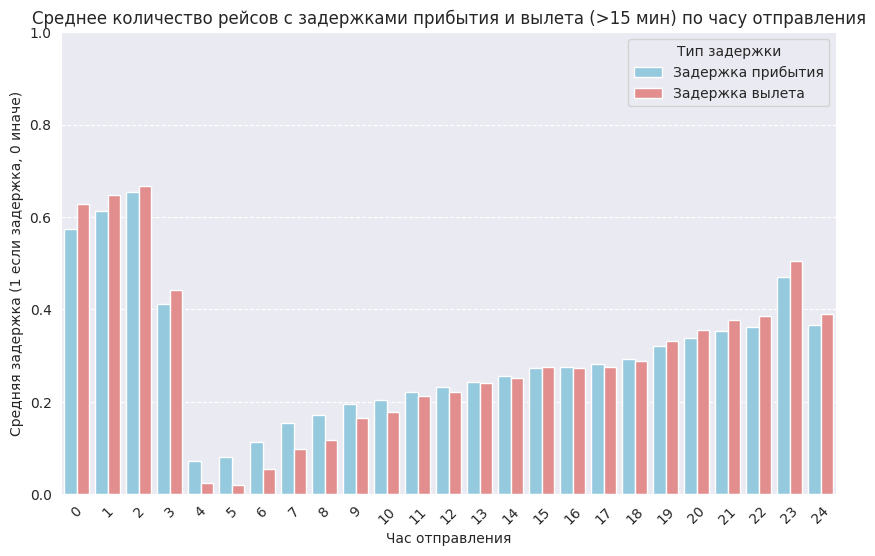

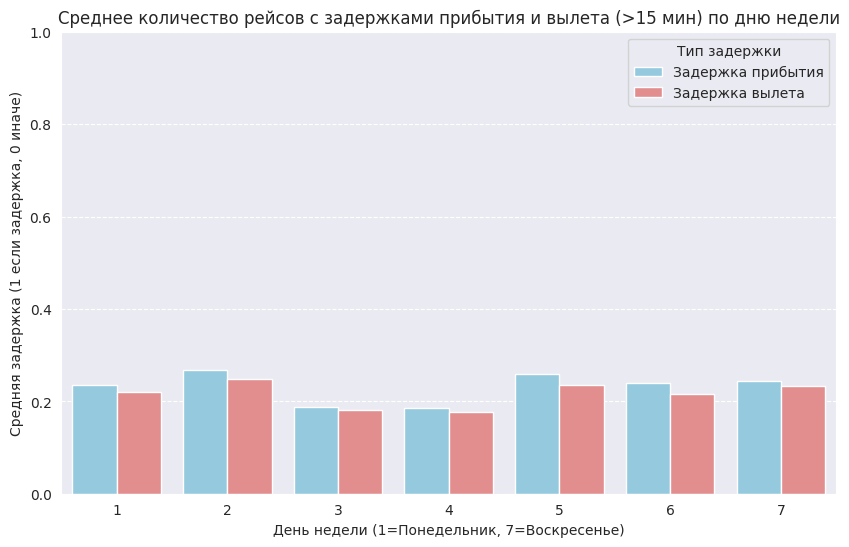

In [ ]:
df.loc[:, 'DepHour'] = df['DepTime_Formatted'].str[:2].astype(pd.Int64Dtype())
df.loc[:, 'ArrDel15'] = df['ArrDel15'].fillna(0)
df.loc[:, 'DepDelayMinutes'] = df['DepDelayMinutes'].fillna(0)
df.loc[:, 'DepDel15'] = (df['DepDelayMinutes'] > 15).astype(int)

avg_delay_by_hour = df.groupby('DepHour')[['ArrDel15', 'DepDel15']].mean().reset_index()
avg_delay_by_day = df.groupby('DayOfWeek')[['ArrDel15', 'DepDel15']].mean().reset_index()

legend_label_map = {
    'ArrDel15': 'Задержка прибытия',
    'DepDel15': 'Задержка вылета'
}

avg_delay_by_hour_melted = avg_delay_by_hour.melt(id_vars='DepHour', var_name='DelayType', value_name='AverageDelay')
avg_delay_by_hour_melted['DelayType'] = avg_delay_by_hour_melted['DelayType'].map(legend_label_map)

avg_delay_by_day_melted = avg_delay_by_day.melt(id_vars='DayOfWeek', var_name='DelayType', value_name='AverageDelay')
avg_delay_by_day_melted['DelayType'] = avg_delay_by_day_melted['DelayType'].map(legend_label_map)


plt.figure(figsize=(10, 6))
sns.barplot(x='DepHour', y='AverageDelay', hue='DelayType', data=avg_delay_by_hour_melted, palette={'Задержка прибытия': 'skyblue', 'Задержка вылета': 'lightcoral'})
plt.title('Среднее количество рейсов с задержками прибытия и вылета (>15 мин) по часу отправления')
plt.xlabel('Час отправления')
plt.ylabel('Средняя задержка (1 если задержка, 0 иначе)')
plt.xticks(rotation=45)
plt.legend(title='Тип задержки')
plt.grid(axis='y', linestyle='--')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='AverageDelay', hue='DelayType', data=avg_delay_by_day_melted, palette={'Задержка прибытия': 'skyblue', 'Задержка вылета': 'lightcoral'})
plt.title('Среднее количество рейсов с задержками прибытия и вылета (>15 мин) по дню недели')
plt.xlabel('День недели (1=Понедельник, 7=Воскресенье)')
plt.ylabel('Средняя задержка (1 если задержка, 0 иначе)')
plt.legend(title='Тип задержки')
plt.grid(axis='y', linestyle='--')
plt.ylim(0, 1)
plt.show()

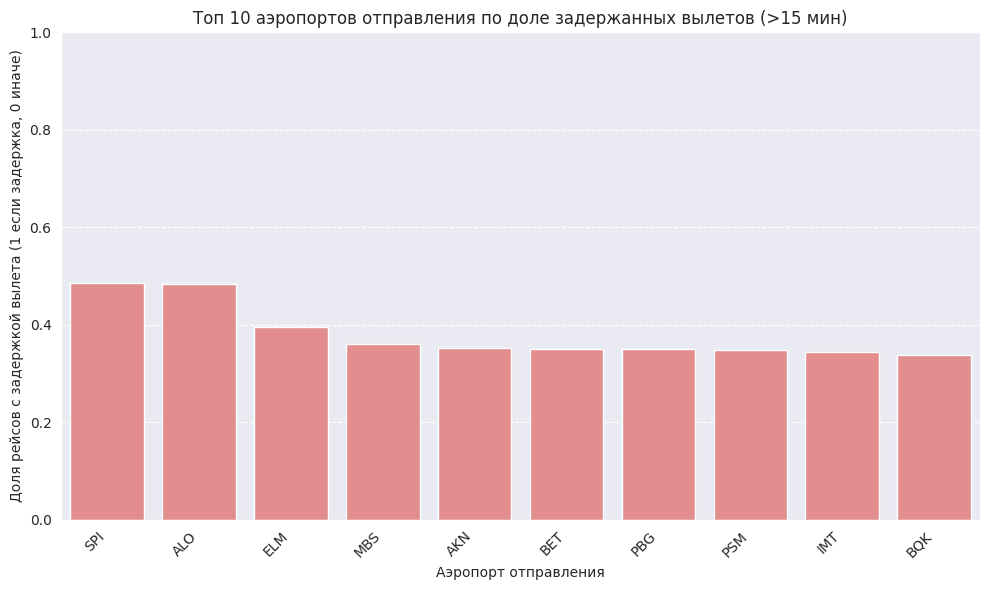

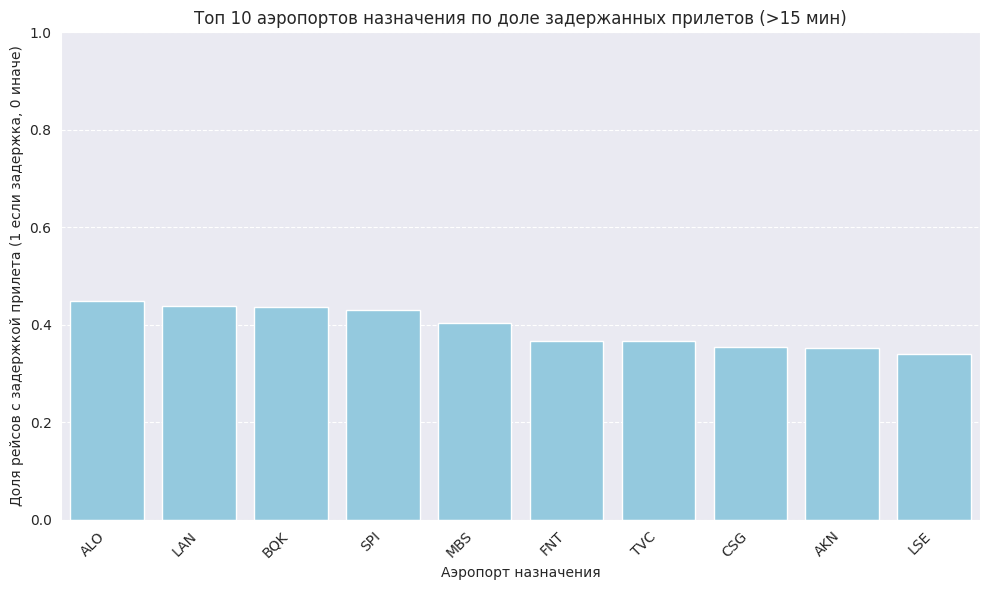

In [ ]:
origin_dep_delay = df.groupby('Origin')['DepDel15'].mean().reset_index()
origin_dep_delay = origin_dep_delay.sort_values(by='DepDel15', ascending=False).head(10)

dest_arr_delay = df.groupby('Dest')['ArrDel15'].mean().reset_index()
dest_arr_delay = dest_arr_delay.sort_values(by='ArrDel15', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Origin', y='DepDel15', data=origin_dep_delay, color='lightcoral')
plt.title('Топ 10 аэропортов отправления по доле задержанных вылетов (>15 мин)')
plt.xlabel('Аэропорт отправления')
plt.ylabel('Доля рейсов с задержкой вылета (1 если задержка, 0 иначе)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Dest', y='ArrDel15', data=dest_arr_delay, color='skyblue')
plt.title('Топ 10 аэропортов назначения по доле задержанных прилетов (>15 мин)')
plt.xlabel('Аэропорт назначения')
plt.ylabel('Доля рейсов с задержкой прилета (1 если задержка, 0 иначе)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

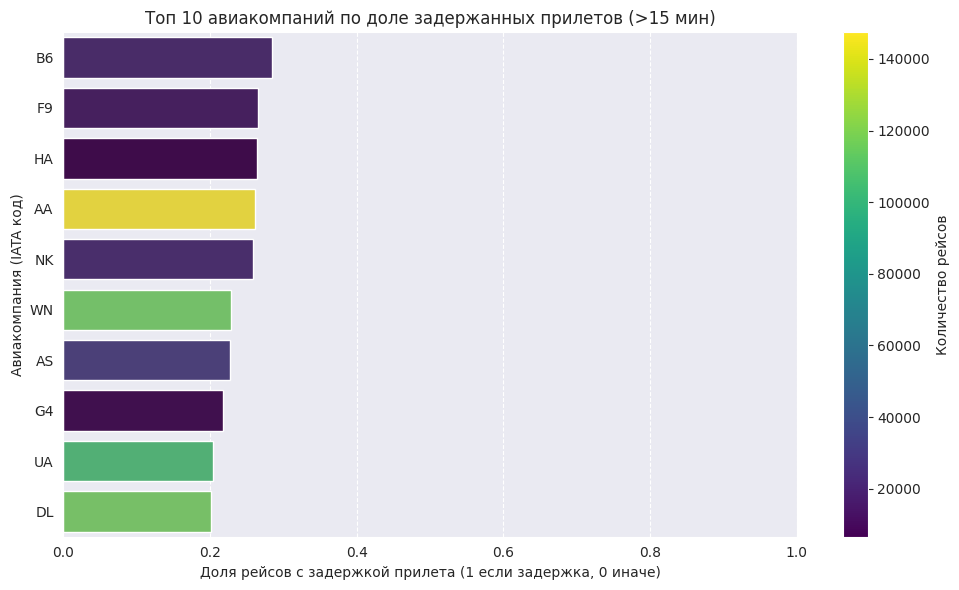

In [ ]:
airline_arr_delay = df.groupby('IATA_Code_Marketing_Airline')['ArrDel15'].mean().reset_index()

flight_counts = df['IATA_Code_Marketing_Airline'].value_counts().reset_index()
flight_counts.columns = ['IATA_Code_Marketing_Airline', 'FlightCount']

airline_arr_delay = pd.merge(airline_arr_delay, flight_counts, on='IATA_Code_Marketing_Airline', how='left')

airline_arr_delay = airline_arr_delay.sort_values(by=['ArrDel15', 'FlightCount'], ascending=[False, False]).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='ArrDel15', y='IATA_Code_Marketing_Airline', data=airline_arr_delay,
            palette='viridis', hue='FlightCount', dodge=False, legend=False)
plt.title('Топ 10 авиакомпаний по доле задержанных прилетов (>15 мин)')
plt.xlabel('Доля рейсов с задержкой прилета (1 если задержка, 0 иначе)')
plt.ylabel('Авиакомпания (IATA код)')
plt.grid(axis='x', linestyle='--')
plt.xlim(0, 1)
norm = plt.Normalize(airline_arr_delay['FlightCount'].min(), airline_arr_delay['FlightCount'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=plt.gca(), label='Количество рейсов')

plt.tight_layout()
plt.show()

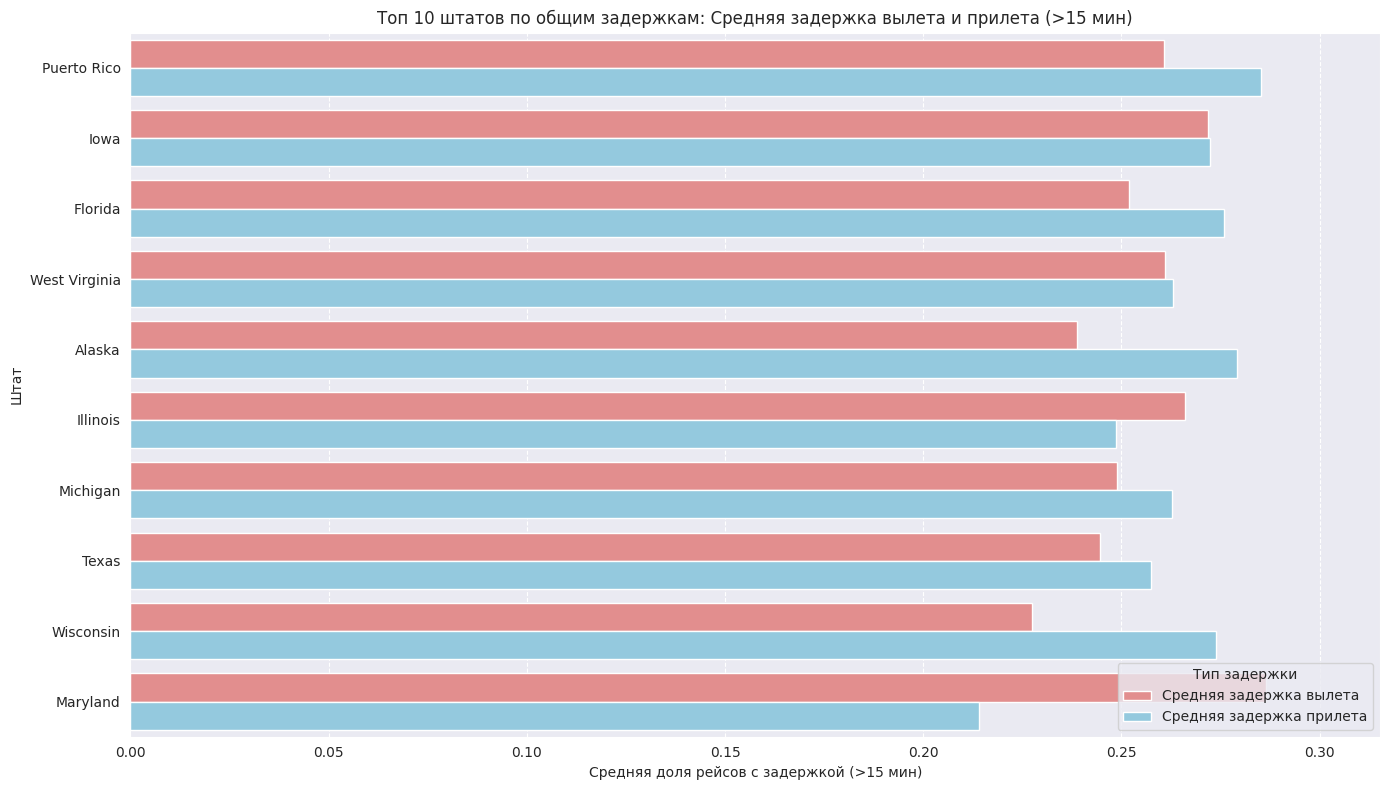

In [ ]:
df.loc[:, 'ArrDel15'] = df['ArrDel15'].fillna(0)
df.loc[:, 'DepDelayMinutes'] = df['DepDelayMinutes'].fillna(0)
df.loc[:, 'DepDel15'] = (df['DepDelayMinutes'] > 15).astype(int)

origin_flight_counts = df['OriginStateName'].value_counts().reset_index()
origin_flight_counts.columns = ['StateName', 'OriginFlightCount']

dest_flight_counts = df['DestStateName'].value_counts().reset_index()
dest_flight_counts.columns = ['StateName', 'DestFlightCount']

origin_state_dep_delay = df.groupby('OriginStateName')['DepDel15'].mean().reset_index()
dest_state_arr_delay = df.groupby('DestStateName')['ArrDel15'].mean().reset_index()

state_delays = pd.merge(origin_state_dep_delay, dest_state_arr_delay, left_on='OriginStateName', right_on='DestStateName', how='inner')
state_delays = state_delays.rename(columns={'OriginStateName': 'StateName', 'DepDel15': 'AvgDepDel15', 'ArrDel15': 'AvgArrDel15'})
state_delays = state_delays.drop(columns=['DestStateName'])

state_delays = pd.merge(state_delays, origin_flight_counts, on='StateName', how='left').fillna(0)
state_delays = pd.merge(state_delays, dest_flight_counts, on='StateName', how='left').fillna(0)
state_delays['TotalFlights'] = state_delays['OriginFlightCount'] + state_delays['DestFlightCount']

state_delays['OverallDelay'] = (state_delays['AvgDepDel15'] + state_delays['AvgArrDel15']) / 2

top_n_states = 10
top_states_with_delays = state_delays.sort_values(by='OverallDelay', ascending=False).head(top_n_states)

top_states_melted = top_states_with_delays.melt(id_vars=['StateName', 'TotalFlights'],
                                                value_vars=['AvgDepDel15', 'AvgArrDel15'],
                                                var_name='DelayType',
                                                value_name='AverageDelay')

delay_type_map = {
    'AvgDepDel15': 'Средняя задержка вылета',
    'AvgArrDel15': 'Средняя задержка прилета'
}
top_states_melted['DelayType'] = top_states_melted['DelayType'].map(delay_type_map)

plt.figure(figsize=(14, 8))
sns.barplot(x='AverageDelay', y='StateName', hue='DelayType', data=top_states_melted,
            palette={'Средняя задержка вылета': 'lightcoral', 'Средняя задержка прилета': 'skyblue'})
plt.title('Топ 10 штатов по общим задержкам: Средняя задержка вылета и прилета (>15 мин)')
plt.xlabel('Средняя доля рейсов с задержкой (>15 мин)')
plt.ylabel('Штат')
plt.xlim(0, top_states_melted['AverageDelay'].max() * 1.1) # Set x-axis max with a little buffer
plt.legend(title='Тип задержки')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

Descriptive statistics for OverallDelay:
count    52.000000
mean      0.217657
std       0.032645
min       0.067961
25%       0.199862
50%       0.216896
75%       0.233582
max       0.273019
Name: OverallDelay, dtype: float64


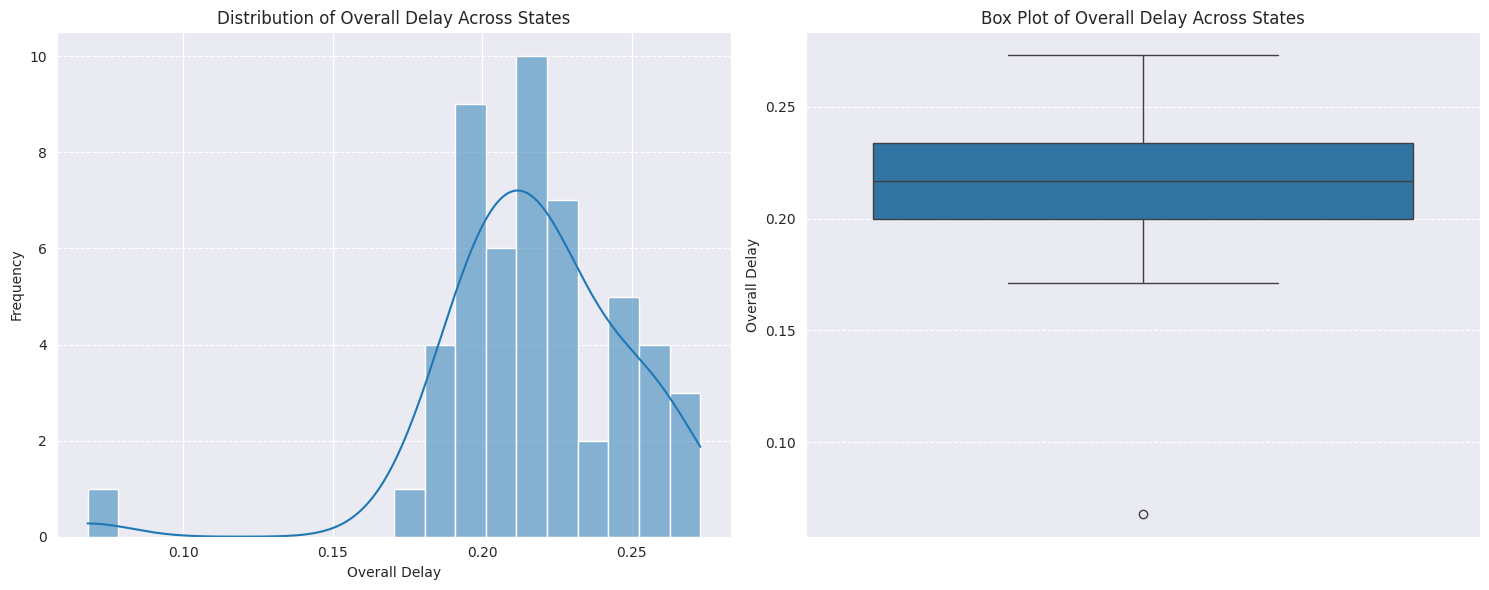

In [ ]:
print("Descriptive statistics for OverallDelay:")
print(state_delays['OverallDelay'].describe())

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(state_delays['OverallDelay'], bins=20, kde=True)
plt.title('Distribution of Overall Delay Across States')
plt.xlabel('Overall Delay')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')

plt.subplot(1, 2, 2)
sns.boxplot(y=state_delays['OverallDelay'])
plt.title('Box Plot of Overall Delay Across States')
plt.ylabel('Overall Delay')
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

In [ ]:
q1 = state_delays['OverallDelay'].quantile(0.25)
q3 = state_delays['OverallDelay'].quantile(0.75)

def categorize_delay(delay):
    if delay < q1:
        return 'Low Delay'
    elif delay <= q3:
        return 'Medium Delay'
    else:
        return 'High Delay'

state_delays['StateDelayCategory'] = state_delays['OverallDelay'].apply(categorize_delay)

state_delays_encoded = pd.get_dummies(state_delays, columns=['StateDelayCategory'], prefix='DelayCategory')

print("DataFrame with 'StateDelayCategory' and one-hot encoded features:")
print(state_delays_encoded.head())

DataFrame with 'StateDelayCategory' and one-hot encoded features:
    StateName  AvgDepDel15  AvgArrDel15  OriginFlightCount  DestFlightCount  \
0     Alabama     0.196124     0.237377               3044             3050   
1      Alaska     0.238674     0.279054               3046             3046   
2     Arizona     0.189480     0.210503              18023            18014   
3    Arkansas     0.225724     0.250107               2348             2347   
4  California     0.168143     0.199887              58272            58263   

   TotalFlights  OverallDelay  DelayCategory_High Delay  \
0          6094      0.216750                     False   
1          6092      0.258864                      True   
2         36037      0.199992                     False   
3          4695      0.237915                      True   
4        116535      0.184015                     False   

   DelayCategory_Low Delay  DelayCategory_Medium Delay  
0                    False                     

In [ ]:
df = pd.merge(df, state_delays_encoded, left_on='OriginStateName', right_on='StateName', how='left')
df.head()

,Year,Month,DayofMonth,DayOfWeek,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,IATA_Code_Operating_Airline,Origin,OriginCityName,OriginStateName,...,StateName,AvgDepDel15,AvgArrDel15,OriginFlightCount,DestFlightCount,TotalFlights,OverallDelay,DelayCategory_High Delay,DelayCategory_Low Delay,DelayCategory_Medium Delay
0,2024,1,14,7,UA,4432,G7,MHT,"Manchester, NH",New Hampshire,...,New Hampshire,0.191033,0.237817,513,513,1026,0.214425,False,False,True
1,2024,1,14,7,UA,4430,G7,IAD,"Washington, DC",Virginia,...,Virginia,0.192978,0.218971,21873,21875,43748,0.205975,False,False,True
2,2024,1,14,7,UA,4429,G7,EWR,"Newark, NJ",New Jersey,...,New Jersey,0.177158,0.165164,11978,11982,23960,0.171161,False,True,False
3,2024,1,14,7,UA,4428,G7,STL,"St. Louis, MO",Missouri,...,Missouri,0.226315,0.233756,10017,10019,20036,0.230036,False,False,True
4,2024,1,14,7,UA,4427,G7,STL,"St. Louis, MO",Missouri,...,Missouri,0.226315,0.233756,10017,10019,20036,0.230036,False,False,True


In [ ]:
selected_features = [
    'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepHour', 'DepDelayMinutes', 'DepDel15',
    'DistanceGroup', 'Cancelled',
    'DelayCategory_High Delay', 'DelayCategory_Low Delay', 'DelayCategory_Medium Delay'
]

X = df[selected_features]
y = df['ArrDel15']
X.dropna(inplace=True)
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (448823, 12)
Shape of X_test: (112206, 12)
Shape of y_train: (448823,)
Shape of y_test: (112206,)


/tmp/ipython-input-2162795372.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model = LogisticRegression(solver='liblinear', random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] # Probability for the positive class

print("\n=== Model Evaluation on Test Set ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy = cross_val_score(model, X, y, cv=kf, scoring='accuracy', n_jobs=-1)
cv_roc_auc = cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)

print("\n=== 5-Fold Cross-Validation Results ===")
print(f"Average Accuracy: {cv_accuracy.mean():.4f} (+/- {cv_accuracy.std() * 2:.4f})")
print(f"Average ROC AUC: {cv_roc_auc.mean():.4f} (+/- {cv_roc_auc.std() * 2:.4f})")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(



=== Model Evaluation on Test Set ===
Accuracy: 0.9110
Precision: 0.9127
Recall: 0.6994
F1-Score: 0.7919
ROC AUC: 0.9122

=== 5-Fold Cross-Validation Results ===
Average Accuracy: 0.9121 (+/- 0.0016)
Average ROC AUC: 0.9137 (+/- 0.0024)


## Вычисление и категоризация задержек по аэропортам вылета



In [ ]:
origin_delay_means = df.groupby('Origin')['DepDel15'].mean().reset_index()
origin_delay_means.rename(columns={'DepDel15': 'OriginAvgDepDel15'}, inplace=True)
print("Average departure delays by origin airport calculated and column renamed:")
print(origin_delay_means.head())

Average departure delays by origin airport calculated and column renamed:
  Origin  OriginAvgDepDel15
0    ABE           0.169054
1    ABI           0.165563
2    ABQ           0.169264
3    ABR           0.163934
4    ABY           0.177419


In [ ]:
origin_delay_means['OriginDelayLevel'] = pd.qcut(
    origin_delay_means['OriginAvgDepDel15'],
    q=3,
    labels=False,
    duplicates='drop'
) + 1
print("Categorized 'OriginAvgDepDel15' into 'OriginDelayLevel':")
print(origin_delay_means.head())

Categorized 'OriginAvgDepDel15' into 'OriginDelayLevel':
  Origin  OriginAvgDepDel15  OriginDelayLevel
0    ABE           0.169054                 1
1    ABI           0.165563                 1
2    ABQ           0.169264                 1
3    ABR           0.163934                 1
4    ABY           0.177419                 2


In [ ]:

columns_to_drop = ['OriginAvgDepDel15', 'OriginDelayLevel']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

origin_delay_means = df.groupby('Origin')['DepDel15'].mean().reset_index()

origin_delay_means.rename(columns={'DepDel15': 'OriginAvgDepDel15'}, inplace=True)

origin_delay_means['OriginDelayLevel'] = pd.qcut(
    origin_delay_means['OriginAvgDepDel15'],
    q=3,
    labels=False,
    duplicates='drop' # Обрабатываем случаи, когда есть дубликаты квантилей
) + 1 # Преобразуем 0, 1, 2 в 1, 2, 3 для лучшей читаемости

df = pd.merge(df, origin_delay_means[['Origin', 'OriginAvgDepDel15', 'OriginDelayLevel']], on='Origin', how='left')

print("Первые 5 строк DataFrame с новым признаком 'OriginDelayLevel' и средней задержкой:")
print(df[['Origin', 'OriginAvgDepDel15', 'OriginDelayLevel']].head())

print("\nРаспределение нового признака 'OriginDelayLevel':")
print(df['OriginDelayLevel'].value_counts())


Первые 5 строк DataFrame с новым признаком 'OriginDelayLevel' и средней задержкой:
  Origin  OriginAvgDepDel15  OriginDelayLevel
0    MHT           0.183673                 2
1    IAD           0.182612                 2
2    EWR           0.178276                 2
3    STL           0.227352                 3
4    STL           0.227352                 3

Распределение нового признака 'OriginDelayLevel':
OriginDelayLevel
2    264252
3    236158
1     82015
Name: count, dtype: int64


In [ ]:

columns_to_drop = ['DestAvgArrDel15', 'DestDelayLevel']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

dest_delay_means = df.groupby('Dest')['ArrDel15'].mean().reset_index()

dest_delay_means.rename(columns={'ArrDel15': 'DestAvgArrDel15'}, inplace=True)

dest_delay_means['DestDelayLevel'] = pd.qcut(
    dest_delay_means['DestAvgArrDel15'],
    q=3,
    labels=False,
    duplicates='drop'
) + 1

df = pd.merge(df, dest_delay_means[['Dest', 'DestAvgArrDel15', 'DestDelayLevel']], on='Dest', how='left')

print("Первые 5 строк DataFrame с новым признаком 'DestDelayLevel' и средней задержкой:")
print(df[['Dest', 'DestAvgArrDel15', 'DestDelayLevel']].head())

print("\nРаспределение нового признака 'DestDelayLevel':")
print(df['DestDelayLevel'].value_counts())

Первые 5 строк DataFrame с новым признаком 'DestDelayLevel' и средней задержкой:
  Dest  DestAvgArrDel15  DestDelayLevel
0  EWR         0.164110               1
1  EWR         0.164110               1
2  MHT         0.242857               3
3  ORD         0.259412               3
4  IAD         0.199002               1

Распределение нового признака 'DestDelayLevel':
DestDelayLevel
2    255380
3    211826
1    115219
Name: count, dtype: int64


In [ ]:
columns_to_drop = ['AirlineAvgArrDel15', 'AirlineDelayLevel']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

airline_delay_means = df.groupby('IATA_Code_Marketing_Airline')['ArrDel15'].mean().reset_index()

airline_delay_means.rename(columns={'ArrDel15': 'AirlineAvgArrDel15'}, inplace=True)

airline_delay_means['AirlineDelayLevel'] = pd.qcut(
    airline_delay_means['AirlineAvgArrDel15'],
    q=3,
    labels=False,
    duplicates='drop'
) + 1

df = pd.merge(df, airline_delay_means[['IATA_Code_Marketing_Airline', 'AirlineAvgArrDel15', 'AirlineDelayLevel']], on='IATA_Code_Marketing_Airline', how='left')

print("Первые 5 строк DataFrame с новым признаком 'AirlineDelayLevel' и средней задержкой по авиакомпаниям:")
print(df[['IATA_Code_Marketing_Airline', 'AirlineAvgArrDel15', 'AirlineDelayLevel']].head())

print("\nРаспределение нового признака 'AirlineDelayLevel':")
print(df['AirlineDelayLevel'].value_counts())

Первые 5 строк DataFrame с новым признаком 'AirlineDelayLevel' и средней задержкой по авиакомпаниям:
  IATA_Code_Marketing_Airline  AirlineAvgArrDel15  AirlineDelayLevel
0                          UA            0.204302                  1
1                          UA            0.204302                  1
2                          UA            0.204302                  1
3                          UA            0.204302                  1
4                          UA            0.204302                  1

Распределение нового признака 'AirlineDelayLevel':
AirlineDelayLevel
2    283247
1    258643
3     40535
Name: count, dtype: int64


In [ ]:
selected_features = [
    'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepHour', 'DepDelayMinutes', 'DepDel15',
    'DistanceGroup', 'Cancelled',
    'DelayCategory_High Delay', 'DelayCategory_Low Delay', 'DelayCategory_Medium Delay',
    'OriginDelayLevel', 'DestDelayLevel', 'AirlineDelayLevel'
]

X = df[selected_features].copy()
y = df['ArrDel15'].copy()
X.dropna(inplace=True)
y = y.loc[X.index]

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

print("Data types of X features after update:")
print(X.dtypes)

Shape of X: (561029, 15)
Shape of y: (561029,)
Data types of X features after update:
Year                            int64
Month                           int64
DayofMonth                      int64
DayOfWeek                       int64
DepHour                         Int64
DepDelayMinutes               float64
DepDel15                        int64
DistanceGroup                   int64
Cancelled                     float64
DelayCategory_High Delay         bool
DelayCategory_Low Delay          bool
DelayCategory_Medium Delay       bool
OriginDelayLevel                int64
DestDelayLevel                  int64
AirlineDelayLevel               int64
dtype: object


## Повторное разделение данных, обучение и оценка модели


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

model = LogisticRegression(solver='liblinear', random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\n=== Model Evaluation on Test Set ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy = cross_val_score(model, X, y, cv=kf, scoring='accuracy', n_jobs=-1)
cv_roc_auc = cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)

print("\n=== 5-Fold Stratified Cross-Validation Results ===")
print(f"Average Accuracy: {cv_accuracy.mean():.4f} (+/- {cv_accuracy.std() * 2:.4f})")
print(f"Average ROC AUC: {cv_roc_auc.mean():.4f} (+/- {cv_roc_auc.std() * 2:.4f})")

Shape of X_train: (448823, 15)
Shape of X_test: (112206, 15)
Shape of y_train: (448823,)
Shape of y_test: (112206,)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(



=== Model Evaluation on Test Set ===
Accuracy: 0.9111
Precision: 0.9092
Recall: 0.7031
F1-Score: 0.7930
ROC AUC: 0.9170

=== 5-Fold Stratified Cross-Validation Results ===
Average Accuracy: 0.9125 (+/- 0.0013)
Average ROC AUC: 0.9179 (+/- 0.0022)


## Реализация CustomLogisticRegression





In [ ]:
class CustomLogisticRegression:
    """
    Кастомная реализация логистической регрессии с:
    1. Градиентным спуском
    2. L1/L2 регуляризацией
    3. Разными оптимизаторами
    4. Ранней остановкой
    5. Нормализацией признаков
    """

    def __init__(self, learning_rate=0.01, n_iterations=1000,
                 regularization='l2', alpha=0.01, optimizer='gradient_descent',
                 early_stopping=True, patience=10, verbose=False):
        """
        Инициализация модели

        Parameters:
        -----------
        learning_rate : float, скорость обучения
        n_iterations : int, количество итераций обучения
        regularization : str, тип регуляризации ('l1', 'l2', 'elasticnet', None)
        alpha : float, коэффициент регуляризации
        optimizer : str, оптимизатор ('gradient_descent', 'mini_batch', 'stochastic')
        early_stopping : bool, использовать ли раннюю остановку
        patience : int, терпение для ранней остановки
        verbose : bool, вывод процесса обучения
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.regularization = regularization
        self.alpha = alpha
        self.optimizer = optimizer
        self.early_stopping = early_stopping
        self.patience = patience
        self.verbose = verbose

        self.weights = None
        self.bias = None
        self.loss_history = []
        self.val_loss_history = []
        self.X_mean = None
        self.X_std = None

    @staticmethod
    def _sigmoid(z):
        """Сигмоидная функция"""
        return 1 / (1 + np.exp(-z))

    def _compute_loss(self, y_true, y_pred, sample_size=None):
        """Вычисление функции потерь (бинарная кросс-энтропия) с регуляризацией"""
        # Избегаем log(0) - добавляем очень малое число к y_pred
        epsilon = 1e-10
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        # Бинарная кросс-энтропия
        bce_loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

        reg_term = 0
        if self.weights is not None:
            if self.regularization == 'l1':
                reg_term = self.alpha * np.sum(np.abs(self.weights))
            elif self.regularization == 'l2':
                reg_term = self.alpha * np.sum(self.weights ** 2)
            elif self.regularization == 'elasticnet':
                # Для Elastic Net обычно используют два параметра, L1_ratio и alpha.
                # Здесь для простоты используем одно alpha и делим пополам.
                l1_ratio = 0.5 # Пропорция L1 составляющей
                reg_term = self.alpha * (l1_ratio * np.sum(np.abs(self.weights)) + (1 - l1_ratio) * np.sum(self.weights ** 2))

        # Если sample_size предоставлен, нормализуем reg_term на размер выборки.
        # Это особенно важно для мини-батчей.
        if sample_size is not None and sample_size > 0:
             # Если alpha уже включает 1/N, то делить еще раз не нужно.
             # В нашей реализации alpha - это lambda, а не lambda/N
             # Поэтому делим на N
            reg_term = reg_term / sample_size

        return bce_loss + reg_term

    def _compute_gradients(self, X, y_true, y_pred):
        """Вычисление градиентов функции потерь по весам и смещению"""
        m = X.shape[0]
        error = y_pred - y_true

        # Градиенты для BCE (без регуляризации)
        dw = (1/m) * X.T @ error
        db = (1/m) * np.sum(error)

        # Добавляем градиенты регуляризации
        if self.regularization == 'l1':
            dw += self.alpha * np.sign(self.weights) / m # Делим на m, так как loss также усредняется по m
        elif self.regularization == 'l2':
            dw += (2 * self.alpha * self.weights) / m # Делим на m, так как loss также усредняется по m
        elif self.regularization == 'elasticnet':
            l1_ratio = 0.5
            dw += self.alpha * (l1_ratio * np.sign(self.weights) + (1 - l1_ratio) * 2 * self.weights) / m

        return dw, db

    def _initialize_parameters(self, n_features):
        """Инициализация весов и смещения"""
        # Инициализация Ксавьера для лучшей сходимости
        # Для сигмоиды рекомендуется np.sqrt(1 / n_features)
        limit = np.sqrt(1 / n_features)
        self.weights = np.random.uniform(-limit, limit, size=n_features)
        self.bias = 0.0

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Обучение модели

        Parameters:
        -----------
        X : array-like, тренировочные признаки
        y : array-like, целевая переменная
        X_val : array-like, валидационные признаки (опционально)
        y_val : array-like, валидационная целевая переменная (опционально)
        """
        X = np.array(X).astype(float) # Ensure X is float array to prevent TypeError with np.std
        y = np.array(y).flatten().astype(float) # Ensure y is float array

        # Нормализация признаков
        self.X_mean = np.mean(X, axis=0)
        self.X_std = np.std(X, axis=0)
        # Избегаем деления на ноль для константных признаков
        self.X_std[self.X_std == 0] = 1
        X_normalized = (X - self.X_mean) / self.X_std

        # Инициализация параметров
        self._initialize_parameters(X_normalized.shape[1])

        # Для ранней остановки
        best_val_loss = float('inf')
        patience_counter = 0
        best_weights = self.weights.copy()
        best_bias = self.bias

        self.loss_history = []
        self.val_loss_history = []

        for i in range(self.n_iterations):
            # Выбор данных для оптимизатора
            if self.optimizer == 'stochastic':
                idx = np.random.randint(0, X_normalized.shape[0])
                X_batch = X_normalized[idx:idx+1]
                y_batch = y[idx:idx+1]
                current_batch_size = 1
            elif self.optimizer == 'mini_batch':
                batch_size = 64 # Можно настроить
                idx = np.random.choice(X_normalized.shape[0], batch_size, replace=False)
                X_batch = X_normalized[idx]
                y_batch = y[idx]
                current_batch_size = batch_size
            else: # 'gradient_descent'
                X_batch = X_normalized
                y_batch = y
                current_batch_size = X_normalized.shape[0]

            # Предсказания на текущем батче
            z_batch = X_batch @ self.weights + self.bias
            y_pred_batch = self._sigmoid(z_batch)

            # Вычисление градиентов
            dw, db = self._compute_gradients(X_batch, y_batch, y_pred_batch)

            # Обновление весов и смещения
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Сохранение истории потерь и ранняя остановка
            if (i % 10 == 0) or (i == self.n_iterations - 1):
                # Расчет потерь на полном тренировочном наборе
                z_full = X_normalized @ self.weights + self.bias
                y_pred_full = self._sigmoid(z_full)
                train_loss = self._compute_loss(y, y_pred_full, X.shape[0])
                self.loss_history.append(train_loss)

                if X_val is not None and y_val is not None:
                    X_val_norm = (np.array(X_val).astype(float) - self.X_mean) / self.X_std # Explicitly convert X_val to float
                    y_val_float = np.array(y_val).flatten().astype(float) # Ensure y_val is float
                    z_val = X_val_norm @ self.weights + self.bias
                    y_val_pred = self._sigmoid(z_val)
                    val_loss = self._compute_loss(y_val_float, y_val_pred, X_val.shape[0])
                    self.val_loss_history.append(val_loss)

                    if self.early_stopping:
                        # Условие улучшения для ранней остановки (уменьшение потери)
                        if val_loss < best_val_loss - 1e-4: # Добавляем небольшой порог для стабильности
                            best_val_loss = val_loss
                            patience_counter = 0
                            best_weights = self.weights.copy()
                            best_bias = self.bias
                        else:
                            patience_counter += 1

                        if patience_counter >= self.patience:
                            if self.verbose:
                                print(f"Ранняя остановка на итерации {i}")
                            self.weights = best_weights
                            self.bias = best_bias
                            break

                if self.verbose and i % 100 == 0:
                    if X_val is not None and y_val is not None:
                        print(f"Iteration {i}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")
                    else:
                        print(f"Iteration {i}: Train Loss = {train_loss:.4f}")

        return self

    def predict_proba(self, X):
        """Предсказывает вероятности принадлежности к положительному классу"""
        if self.X_mean is None or self.X_std is None:
            raise RuntimeError("Модель не обучена. Вызовите .fit() сначала.")

        X = np.array(X).astype(float)
        X_normalized = (X - self.X_mean) / self.X_std
        z = X_normalized @ self.weights + self.bias
        return self._sigmoid(z)

    def predict(self, X):
        """Предсказывает классы (0 или 1) на основе порогового значения 0.5"""
        probabilities = self.predict_proba(X)
        return (probabilities >= 0.5).astype(int)

    def get_coefficients(self):
        """Возвращает обученные веса и смещение модели."""
        return self.weights, self.bias

    def score(self, X, y):
        """R² score (для логистической регрессии обычно используются другие метрики)"""
        y_pred_proba = self.predict_proba(X)
        y_pred = (y_pred_proba >= 0.5).astype(int)

        ss_res = np.sum((y - y_pred_proba) ** 2) # Use probabilities directly for continuous comparison
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        if ss_tot == 0:
            return 1.0 # Perfect fit if all y are same
        return 1 - (ss_res / ss_tot)

    def plot_loss_history(self):
        """Визуализация истории потерь"""
        plt.figure(figsize=(10, 6))
        plt.plot(self.loss_history, label='Train Loss')
        if self.val_loss_history:
            plt.plot(self.val_loss_history, label='Validation Loss')
        plt.xlabel('Iteration (x10)')
        plt.ylabel('Loss')
        plt.title('Loss History')
        plt.legend()
        plt.grid(True)
        plt.show()


## Оценка CustomLogisticRegression



Custom Model Train size: (336617, 15)
Custom Model Validation size: (112206, 15)
Custom Model Test size: (112206, 15)

ТЕСТИРОВАНИЕ КАСТОМНОЙ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ
Iteration 0: Train Loss = 0.7455, Val Loss = 0.7454
Iteration 100: Train Loss = 0.2958, Val Loss = 0.2992
Iteration 200: Train Loss = 0.2805, Val Loss = 0.2847
Iteration 300: Train Loss = 0.2765, Val Loss = 0.2809
Iteration 400: Train Loss = 0.2751, Val Loss = 0.2797
Iteration 500: Train Loss = 0.2741, Val Loss = 0.2789
Iteration 600: Train Loss = 0.2735, Val Loss = 0.2783
Iteration 700: Train Loss = 0.2725, Val Loss = 0.2773
Iteration 800: Train Loss = 0.2719, Val Loss = 0.2766
Iteration 900: Train Loss = 0.2712, Val Loss = 0.2760
Iteration 1000: Train Loss = 0.2708, Val Loss = 0.2757
Iteration 1100: Train Loss = 0.2701, Val Loss = 0.2751
Iteration 1200: Train Loss = 0.2696, Val Loss = 0.2746
Iteration 1300: Train Loss = 0.2694, Val Loss = 0.2743
Iteration 1400: Train Loss = 0.2691, Val Loss = 0.2740
Iteration 1500: Train

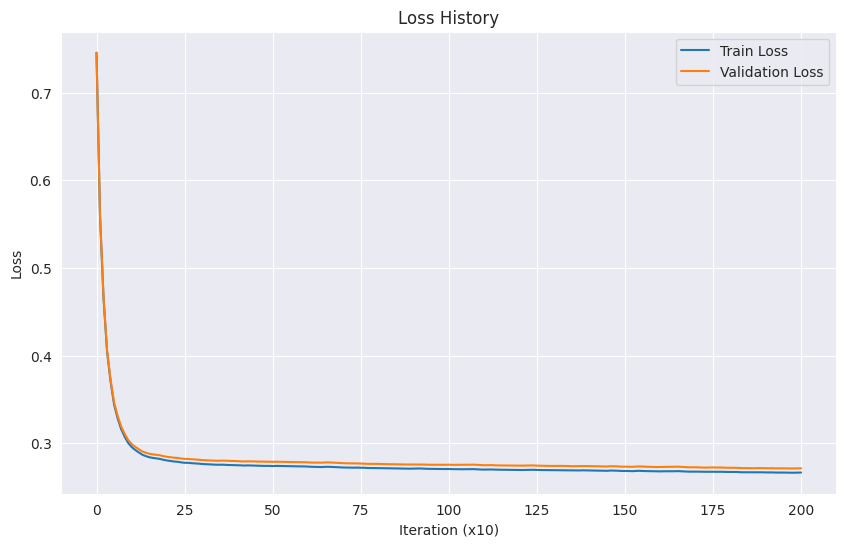


СРАВНЕНИЕ СО SKLEARN LogisticRegression


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(



=== Sklearn LogisticRegression Metrics on Test Set ===
Accuracy: 0.9111
Precision: 0.9092
Recall: 0.7031
F1-Score: 0.7930
ROC AUC: 0.9170

СРАВНИТЕЛЬНАЯ ТАБЛИЦА МЕТРИК
   Metric  Custom Model  Sklearn Model
 Accuracy        0.9054         0.9111
Precision        0.8270         0.9092
   Recall        0.7703         0.7031
 F1-Score        0.7976         0.7930
  ROC AUC        0.9090         0.9170


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd # Ensure pandas is imported if not already

# Разделение данных на тренировочные и валидационные для CustomLogisticRegression
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42) # 0.25 of 0.8 is 0.2

print(f"Custom Model Train size: {X_train.shape}")
print(f"Custom Model Validation size: {X_val.shape}")
print(f"Custom Model Test size: {X_test.shape}")

# 1. Тренировка и оценка CustomLogisticRegression
print("\n" + "="*60)
print("ТЕСТИРОВАНИЕ КАСТОМНОЙ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ")
print("="*60)

custom_model = CustomLogisticRegression(
    learning_rate=0.1, # Увеличим learning rate для более быстрой сходимости
    n_iterations=2000, # Увеличим количество итераций
    regularization='l2',
    alpha=0.01,
    optimizer='mini_batch',
    early_stopping=True,
    patience=50, # Увеличим терпение для ранней остановки
    verbose=True
)

custom_model.fit(X_train, y_train, X_val, y_val)

y_pred_custom = custom_model.predict(X_test)
y_proba_custom = custom_model.predict_proba(X_test)

custom_accuracy = accuracy_score(y_test, y_pred_custom)
custom_precision = precision_score(y_test, y_pred_custom)
custom_recall = recall_score(y_test, y_pred_custom)
custom_f1 = f1_score(y_test, y_pred_custom)
custom_roc_auc = roc_auc_score(y_test, y_proba_custom)

print("\n=== CustomLogisticRegression Metrics on Test Set ===")
print(f"Accuracy: {custom_accuracy:.4f}")
print(f"Precision: {custom_precision:.4f}")
print(f"Recall: {custom_recall:.4f}")
print(f"F1-Score: {custom_f1:.4f}")
print(f"ROC AUC: {custom_roc_auc:.4f}")

custom_model.plot_loss_history()

# 2. Тренировка и оценка Sklearn LogisticRegression
print("\n" + "="*60)
print("СРАВНЕНИЕ СО SKLEARN LogisticRegression")
print("="*60)

sklearn_model = LogisticRegression(solver='liblinear', random_state=42, n_jobs=-1, max_iter=2000)
sklearn_model.fit(X_train_full, y_train_full)

y_pred_sklearn = sklearn_model.predict(X_test)
y_proba_sklearn = sklearn_model.predict_proba(X_test)[:, 1]

sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)
sklearn_precision = precision_score(y_test, y_pred_sklearn)
sklearn_recall = recall_score(y_test, y_pred_sklearn)
sklearn_f1 = f1_score(y_test, y_pred_sklearn)
sklearn_roc_auc = roc_auc_score(y_test, y_proba_sklearn)

print("\n=== Sklearn LogisticRegression Metrics on Test Set ===")
print(f"Accuracy: {sklearn_accuracy:.4f}")
print(f"Precision: {sklearn_precision:.4f}")
print(f"Recall: {sklearn_recall:.4f}")
print(f"F1-Score: {sklearn_f1:.4f}")
print(f"ROC AUC: {sklearn_roc_auc:.4f}")

# 3. Сравнительная таблица
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'Custom Model': [custom_accuracy, custom_precision, custom_recall, custom_f1, custom_roc_auc],
    'Sklearn Model': [sklearn_accuracy, sklearn_precision, sklearn_recall, sklearn_f1, sklearn_roc_auc]
}

comparison_df = pd.DataFrame(metrics_data)
print("\n" + "="*60)
print("СРАВНИТЕЛЬНАЯ ТАБЛИЦА МЕТРИК")
print("="*60)
print(comparison_df.round(4).to_string(index=False))